## Implémentation de la formule en Python

In [8]:
#Imporation des différentes librairies nécessaires
import math
from scipy.stats import norm

In [159]:
S_0 = 228.5 #Prix actuel de l'actif sous jacent
X = 218.5  #Prix d'exercice
r = 0.0357  #Taux d'intérêt sans risque
T = 0.1096  #Temps restant avant l'expiration de l'option (en années)
vol = 0.15 #volatilité du prix de l'actif (sigma)

In [161]:
#Calcul de d_1
d_1 = (math.log(S_0/X) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))

In [163]:
#Calcul de d_2
d_2 = d_1 - vol * (math.sqrt(T))

In [165]:
#Calcul du prix de l'option
C = S_0 * norm.cdf(d_1) - X * math.exp(-r * T) * norm.cdf(d_2)

In [167]:
print("La valeur de d_1 est:", d_1)
print("La valeur de d_2 est:", d_2)
print("La valeur de l'option est",C)

La valeur de d_1 est: 1.0047741700295105
La valeur de d_2 est: 0.95511533395777
La valeur de l'option est 11.811511447109353


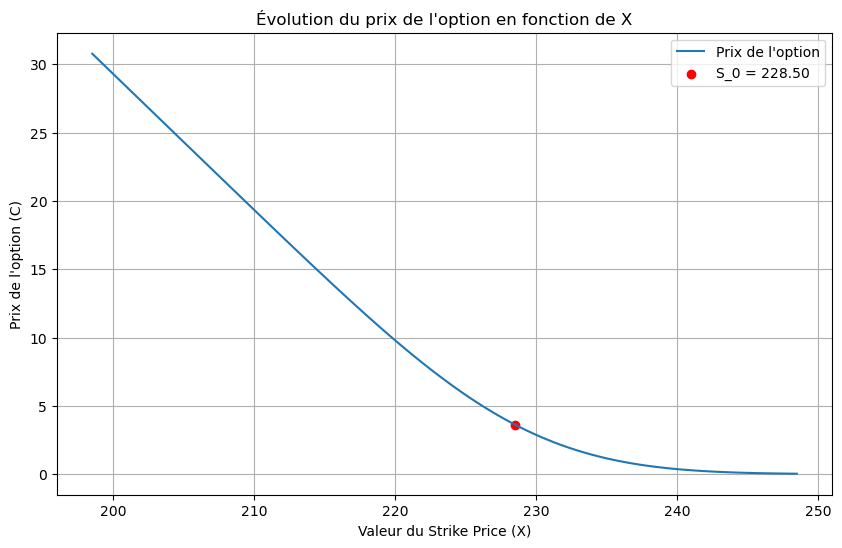

In [201]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Constantes de l'option
S_0 = 228.5  # Prix actuel
r = 0.0357   # Taux d'intérêt sans risque
T = 0.1096   # Temps restant avant l'expiration de l'option (en années)
vol = 0.1048 # Volatilité

# Liste des prix d'exercice (strike prices) entre 198.5 et 248.5
prix = np.linspace(198.5, 248.5, 100)

# Liste pour stocker les prix de l'option
option_prices = []

# Calcul du prix de l'option pour chaque strike price
for X in prix:
    d_1 = (math.log(S_0 / X) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))
    d_2 = d_1 - vol * math.sqrt(T)
    C = S_0 * norm.cdf(d_1) - X * math.exp(-r * T) * norm.cdf(d_2)
    option_prices.append(C)

# Calcul du prix de l'option pour S_0 = 228.5
X_0 = S_0  # Strike price égal au prix actuel
d_1_0 = (math.log(S_0 / X_0) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))
d_2_0 = d_1_0 - vol * math.sqrt(T)
C_0 = S_0 * norm.cdf(d_1_0) - X_0 * math.exp(-r * T) * norm.cdf(d_2_0)

# Tracé du graphe
plt.figure(figsize=(10, 6))
plt.plot(prix, option_prices, label="Prix de l'option")
plt.scatter([X_0], [C_0], color='red', label=f"S_0 = {S_0:.2f}")
plt.xlabel("Valeur du Strike Price (X)")
plt.ylabel("Prix de l'option (C)")
plt.title("Évolution du prix de l'option en fonction de X")
plt.grid(True)
plt.legend()
plt.show()
